# Sudoku Solver using Convolutional Neural Network

## Table of Contents
1. [Importing Libraries](#Importing_Libraries) 
2. [Data_Loading](#Data_Loading)
3. [Data_Analysis](#Data_Analysis)
4. [Data_Preprocessing](#Data_Preprocessing)  
    4.1. [Normalization](#Normalization)  
    4.2. [Data_Splitting](#Data_Splitting)  
5. [Convolutional_Neural_Network](#Convolutional_Neural_Network)  
    5.1. [CNN_1](#CNN-1)  
    5.2. [CNN_2](#CNN-2)    
6. [Prediction](#Prediction_for_model2)

## Importing_Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import disarray

In [2]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Reshape, Dense, Flatten,Activation
from tensorflow.keras.layers import Conv2D, BatchNormalization, LayerNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam

## Data_Loading

In [4]:
#reading the dataset
sudoku_df = pd.read_csv("sudoku.csv")
sudoku_df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [5]:
#dataset has 1,000,000 rows with 2 columns
sudoku_df.shape

(1000000, 2)

In [6]:
#chaking if there are any null values
sudoku_df.isnull().values.any()

False

In [7]:
#cheking the type of data in dataframe for two columns
print(type(sudoku_df.quizzes[0]) , type(sudoku_df.solutions[0]))

<class 'str'> <class 'str'>


In [8]:
#checking the length of both quiz and puzzle
print(f"Quiz length : {len(sudoku_df.quizzes[0])} \nSolution length : {len(sudoku_df.solutions[0])}")

Quiz length : 81 
Solution length : 81


In [9]:
#visualizing first Quiz and Solution after reshaping to 9*9 array
print("Quiz:\n",np.array(list(map(int,list(sudoku_df.quizzes[0])))).reshape(9,9))
print("Solution:\n",np.array(list(map(int,list(sudoku_df.solutions[0])))).reshape(9,9))

Quiz:
 [[0 0 4 3 0 0 2 0 9]
 [0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]
Solution:
 [[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


## Data_Analysis

In [10]:
#get all the blanks per ppuzzle and store in in new column in dataframe
blanks=[]
for i in range(sudoku_df.shape[0]):
    blanks.append(list(sudoku_df['quizzes'][i]).count('0'))
sudoku_df['blanks']=blanks

In [11]:
#see number of puzzles per each set of blank
sudoku_df['blanks'].value_counts()

47    455004
48    263913
46    198940
49     61122
45     12662
50      7748
51       526
44        57
52        28
Name: blanks, dtype: int64

<Axes: xlabel='blanks', ylabel='count'>

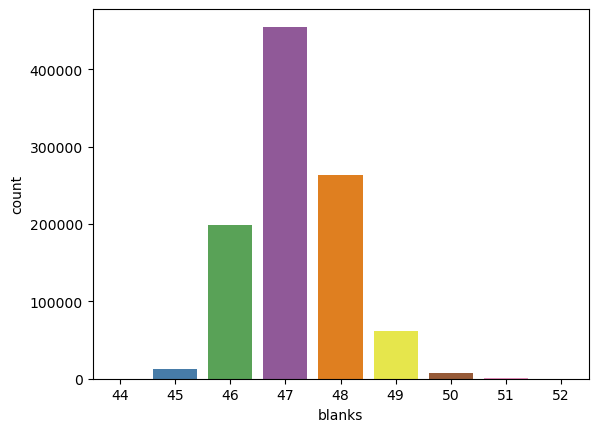

In [12]:
sns.countplot(x=sudoku_df['blanks'] , palette = "Set1")

Most of the puzzles has blanks ranging from 46 to 49.

## Data_Preprocessing

In [13]:
#drop unwanter rows
sudoku_df.drop(['blanks'], axis=1)
sudoku_df.head()

,quizzes,solutions,blanks
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...,46
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...,47
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...,47
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...,48
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...,49


### Normalization

In [14]:
#reshape the quiz and puzzle to make it compatablle for neural network
X = np.array(sudoku_df.quizzes.map(lambda x: list(map(int, x))).to_list()).reshape(-1,9,9,1)
Y = np.array(sudoku_df.solutions.map(lambda x: list(map(int, x))).to_list()).reshape(-1,9,9)

In [15]:
X.shape

(1000000, 9, 9, 1)

In [16]:
#normalize to zero centric value
X = (X / 9) - 0.5

In [17]:
print(X[0].reshape(9,9))

[[-0.5        -0.5        -0.05555556 -0.16666667 -0.5        -0.5
  -0.27777778 -0.5         0.5       ]
 [-0.5        -0.5         0.05555556 -0.5        -0.5         0.5
  -0.5        -0.5        -0.38888889]
 [-0.5         0.27777778 -0.5        -0.5         0.16666667 -0.5
  -0.5        -0.05555556 -0.16666667]
 [-0.5        -0.5         0.16666667 -0.5        -0.5        -0.27777778
  -0.5         0.38888889  0.27777778]
 [-0.38888889  0.5        -0.5        -0.5        -0.5         0.27777778
  -0.05555556 -0.5        -0.5       ]
 [-0.5         0.05555556 -0.5        -0.5         0.38888889 -0.16666667
  -0.5        -0.5        -0.5       ]
 [ 0.16666667 -0.5        -0.5        -0.5        -0.5        -0.5
  -0.38888889 -0.5         0.05555556]
 [-0.5        -0.5        -0.16666667  0.05555556 -0.5         0.38888889
   0.16666667  0.5        -0.5       ]
 [-0.5        -0.05555556 -0.27777778  0.5        -0.38888889 -0.5
  -0.16666667 -0.5        -0.5       ]]


In [18]:
Y -= 1

In [19]:
print(Y[0].reshape(9,9))

[[7 5 3 2 6 0 1 4 8]
 [2 1 4 7 3 8 6 5 0]
 [8 6 0 1 5 4 7 3 2]
 [3 2 5 0 8 1 4 7 6]
 [0 8 7 5 4 6 3 2 1]
 [1 4 6 3 7 2 8 0 5]
 [5 7 8 6 2 3 0 1 4]
 [6 0 2 4 1 7 5 8 3]
 [4 3 1 8 0 5 2 6 7]]


### Data_Splitting

In [20]:
#split the dataset into training, testing and validation data
train_split = 0.8

splitx = int(len(sudoku_df) * train_split)
x_train, x_test = X[:splitx], X[splitx:]
y_train, y_test = Y[:splitx], Y[splitx:]

validation_split = 0.99

splitx_val = int(len(x_test) * validation_split)
x_val, x_test = x_test[:splitx_val], x_test[splitx_val:]
y_val, y_test = y_test[:splitx_val], y_test[splitx_val:]

In [21]:
# valify the size of each Feature set
print(f"x_Train Dataset Size : {x_train.shape}\nx_Validation Dataset Size : {x_val.shape}\nx_Test Dataset Size : {x_test.shape}")

x_Train Dataset Size : (800000, 9, 9, 1)
x_Validation Dataset Size : (198000, 9, 9, 1)
x_Test Dataset Size : (2000, 9, 9, 1)


In [22]:
# valify the size of each target set
print(f"y_Train Dataset Size : {y_train.shape}\ny_Validation Dataset Size : {y_val.shape}\ny_Test Dataset Size : {y_test.shape}")

y_Train Dataset Size : (800000, 9, 9)
y_Validation Dataset Size : (198000, 9, 9)
y_Test Dataset Size : (2000, 9, 9)


## Convolutional_Neural_Network

### CNN-1 

In [24]:
# Design for the first cnn model
model_1 = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'),
    Flatten(),
    Dense(81*9),
    LayerNormalization(axis=-1),
    Reshape((9, 9, 9)),
    Activation('softmax')
])

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 batch_normalization (Batch  (None, 9, 9, 64)          256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_1 (Bat  (None, 9, 9, 64)          256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         8320      
                                                                 
 flatten (Flatten)           (None, 10368)             0

In [26]:
# Train the model
model_1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [57]:
%%time
history1 = model_1.fit(x_train, y_train, batch_size=32, epochs=4, validation_data=(x_val, y_val))

Epoch 1/4
25000/25000 [==============================] - 1797s 72ms/step - loss: 0.3426 - accuracy: 0.8414 - val_loss: 0.3545 - val_accuracy: 0.8332
Epoch 2/4
25000/25000 [==============================] - 1823s 73ms/step - loss: 0.3366 - accuracy: 0.8448 - val_loss: 0.3536 - val_accuracy: 0.8338
Epoch 3/4
25000/25000 [==============================] - 1847s 74ms/step - loss: 0.3323 - accuracy: 0.8473 - val_loss: 0.3525 - val_accuracy: 0.8343
Epoch 4/4
25000/25000 [==============================] - 1856s 74ms/step - loss: 0.3289 - accuracy: 0.8493 - val_loss: 0.3523 - val_accuracy: 0.8345
CPU times: total: 6h 52min 38s
Wall time: 2h 2min 5s


In [29]:
# define a plot function to plot the loss and accuracy of train and test
def loss_acc_plot(history):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(12,6)

    ax[0].plot(history.history['loss'], label='train loss')
    ax[0].plot(history.history['val_loss'], label='val loss')
    ax[0].legend(['train', 'val'], loc='upper right')
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')

    ax[1].plot(history.history['accuracy'], label='accuracy')
    ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[1].legend(['train', 'val'], loc='upper right')
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')

    plt.show()

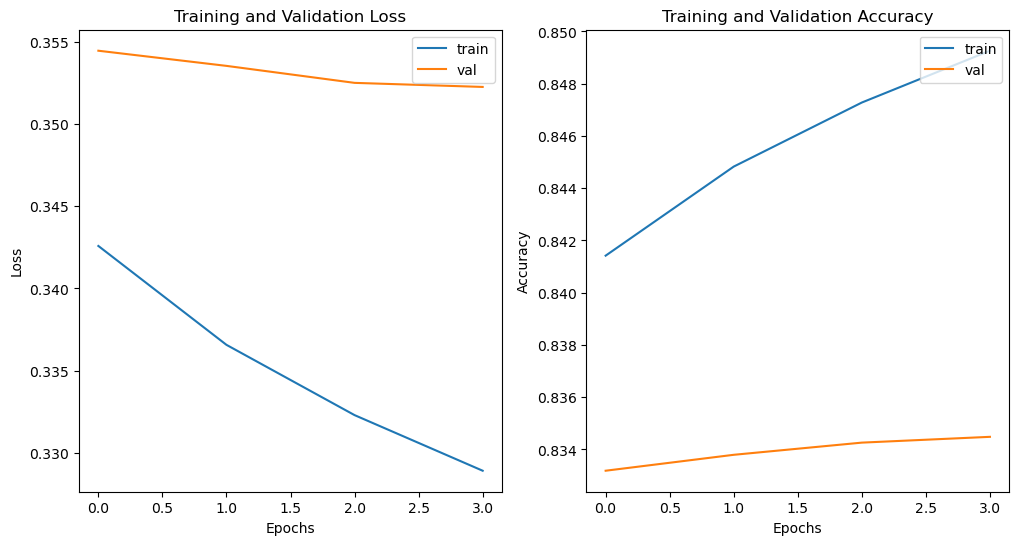

In [58]:
loss_acc_plot(history1)

Based on the training observations, it appears that while the training loss is diminishing, there is a simultaneous increase in the validation loss.So the model is overfitting.

In [31]:
train_accuracy1 = history1.history['accuracy'][-1]
train_loss1 = history1.history['loss'][-1]

In [42]:
val_loss1, val_accuracy1 = model_1.evaluate(x_val,y_val)

6188/6188 [==============================] - 89s 14ms/step - loss: 0.3521 - accuracy: 0.8349


In [55]:
print(f"Training Loss: {train_loss1:.4f}, Training Accuracy: {train_accuracy1:.4f}")
print(f"Done!\nValiation Loss: {val_loss1:.4f}, Validation Accuracy: {val_accuracy1:.4f}")

Training Loss: 0.3289, Training Accuracy: 0.8493
Done!
Valiation Loss: 0.3521, Validation Accuracy: 0.8349


In [68]:
train_pred_1 = model_1.predict(x_train[0].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
print("predicted :\n",train_pred_1)
train_real_1 = y_train[0]+1
print("Original :\n",train_real_1)

1/1 [==============================] - 0s 64ms/step
predicted :
 [[[8 6 4 3 7 1 2 6 9]
  [3 2 5 8 2 9 7 7 1]
  [9 7 1 8 6 1 5 4 3]
  [4 3 6 1 5 2 9 8 7]
  [1 9 8 6 5 7 4 2 6]
  [4 5 7 6 8 3 9 2 6]
  [6 8 9 2 3 4 1 2 5]
  [7 1 3 5 7 8 6 9 4]
  [5 4 2 9 1 6 3 7 8]]]
Original :
 [[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


In [49]:
train_pred_1 - train_real_1

array([[[ 0,  0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0, -2,  0,  0,  1,  0],
        [ 0,  0,  0,  6,  0, -4, -3,  0,  0],
        [ 0,  0,  0,  0, -4,  0,  4,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1,  4],
        [ 2,  0,  0,  2,  0,  0,  0,  1,  0],
        [ 0,  0,  0, -5,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  5,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0]]], dtype=int64)

### CNN-2

In [38]:
# Design for the second cnn model
model_2 = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'),
    # adding MaxPooling layer
    MaxPooling2D(3,3),
    Flatten(),
    Dense(81*9),
    LayerNormalization(axis=-1),
    Reshape((9, 9, 9)),
    Activation('softmax')
])

In [39]:
# print summary of the cnn model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_2 (Bat  (None, 9, 9, 64)          256       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_3 (Bat  (None, 9, 9, 64)          256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         8320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 128)        

In [40]:
# Train the model
model_2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [67]:
%%time

history2 = model_2.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
12500/12500 [==============================] - 239s 19ms/step - loss: 1.0859 - accuracy: 0.5890 - val_loss: 0.6780 - val_accuracy: 0.7337
Epoch 2/15
12500/12500 [==============================] - 253s 20ms/step - loss: 0.5707 - accuracy: 0.7657 - val_loss: 0.5138 - val_accuracy: 0.7817
Epoch 3/15
12500/12500 [==============================] - 247s 20ms/step - loss: 0.4774 - accuracy: 0.7921 - val_loss: 0.4595 - val_accuracy: 0.7965
Epoch 4/15
12500/12500 [==============================] - 251s 20ms/step - loss: 0.4421 - accuracy: 0.8020 - val_loss: 0.4365 - val_accuracy: 0.8030
Epoch 5/15
12500/12500 [==============================] - 253s 20ms/step - loss: 0.4233 - accuracy: 0.8076 - val_loss: 0.4210 - val_accuracy: 0.8076
Epoch 6/15
12500/12500 [==============================] - 271s 22ms/step - loss: 0.4106 - accuracy: 0.8115 - val_loss: 0.4106 - val_accuracy: 0.8107
Epoch 7/15
12500/12500 [==============================] - 269s 21ms/step - loss: 0.4020 - accuracy: 0.8142

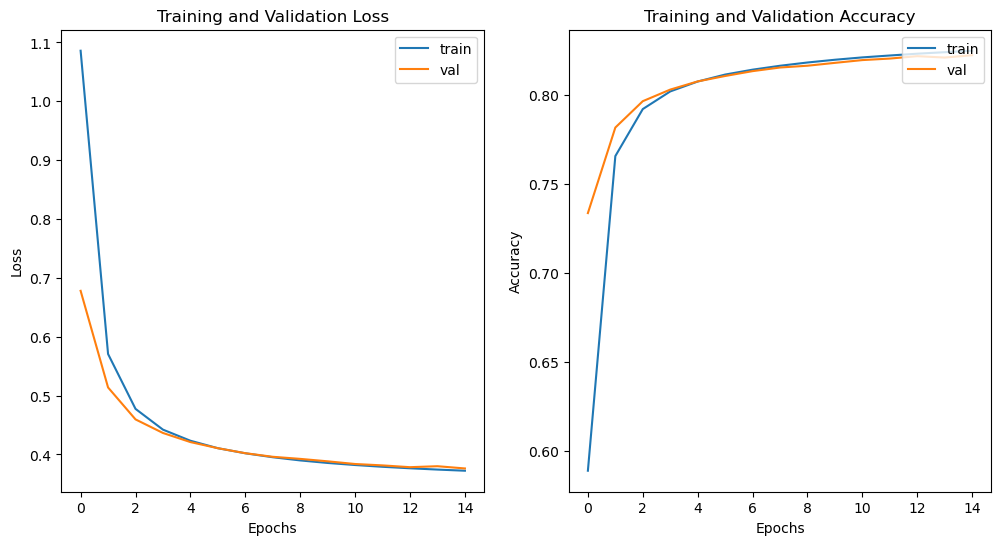

In [68]:
loss_acc_plot(history2)

After 15 epochs the model is showing an accuracy around 82%

In [50]:
train_accuracy_2 = history2.history['accuracy'][-1]
train_loss_2 = history2.history['loss'][-1]

In [52]:
val_loss_2, val_accuracy_2 = model_2.evaluate(x_val,y_val)

6188/6188 [==============================] - 62s 10ms/step - loss: 0.4023 - accuracy: 0.8127


In [65]:
print(f"Training Loss: {train_loss_2:.4f}, Training Accuracy: {train_accuracy_2:.4f}")
print(f"Done!\nValiation Loss: {val_loss_2:.4f}, Validation Accuracy: {val_accuracy_2:.4f}")

Training Loss: 0.3724, Training Accuracy: 0.8249
Done!
Valiation Loss: 0.3533, Validation Accuracy: 0.8217


In [66]:
train_pred_2 = model_2.predict(x_train[0].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
print("predicted :\n",train_pred_2)
train_real_2 = y_train[0]+1
print("Original :\n",train_real_2)

1/1 [==============================] - 0s 306ms/step
predicted :
 [[[8 6 4 3 7 1 2 7 9]
  [3 6 5 8 4 9 7 7 1]
  [9 7 9 1 6 5 5 4 3]
  [4 3 6 1 9 2 9 8 7]
  [1 9 8 6 5 7 4 3 6]
  [7 5 7 1 8 3 9 2 6]
  [6 8 9 2 3 4 1 2 5]
  [7 1 3 5 4 8 6 9 4]
  [5 4 2 9 1 6 3 7 8]]]
Original :
 [[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


In [67]:
train_pred_2 - train_real_2

array([[[ 0,  0,  0,  0,  0,  0,  0,  2,  0],
        [ 0,  4,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  8, -1,  0,  0, -3,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  4,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  4],
        [ 5,  0,  0, -3,  0,  0,  0,  1,  0],
        [ 0,  0,  0, -5,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0]]], dtype=int64)

## Prediction_for_model2

In [130]:
def y_pred_func(len, model):
    list = []
    for i in range(len):
        test_pred = model.predict(x_test[i].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
        list.append((i, test_pred))
    return list

In [196]:
%%time
y_pred_2 = y_pred_func(x_test.shape[0], model_2)

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step
CPU times: total: 1min 38s
Wall time: 2min 27s


In [207]:
y_pred_2[0]

(0,
 array([[[3, 9, 1, 6, 2, 4, 8, 5, 7],
         [2, 4, 6, 7, 9, 8, 2, 2, 3],
         [2, 8, 7, 3, 5, 1, 9, 4, 6],
         [8, 7, 9, 4, 1, 5, 3, 2, 8],
         [3, 3, 8, 2, 9, 7, 1, 1, 4],
         [1, 2, 4, 4, 3, 9, 5, 7, 5],
         [4, 5, 3, 1, 8, 2, 7, 9, 9],
         [9, 1, 1, 5, 7, 6, 4, 4, 2],
         [7, 6, 2, 9, 4, 3, 5, 6, 1]]], dtype=int64))

In [208]:
a = [item[1] for item in y_pred_2]
pred = np.array(a)
pred[0]

array([[[3, 9, 1, 6, 2, 4, 8, 5, 7],
        [2, 4, 6, 7, 9, 8, 2, 2, 3],
        [2, 8, 7, 3, 5, 1, 9, 4, 6],
        [8, 7, 9, 4, 1, 5, 3, 2, 8],
        [3, 3, 8, 2, 9, 7, 1, 1, 4],
        [1, 2, 4, 4, 3, 9, 5, 7, 5],
        [4, 5, 3, 1, 8, 2, 7, 9, 9],
        [9, 1, 1, 5, 7, 6, 4, 4, 2],
        [7, 6, 2, 9, 4, 3, 5, 6, 1]]], dtype=int64)

In [209]:
pred.shape

(2000, 1, 9, 9)

In [210]:
def y_real_func(data):
    len = data.shape[0]
    list = []
    for i in range(len):
        y_real = data[i] +1
        list.append((i, y_real))
    return list

In [211]:
y_real_2 = y_real_func(y_test)

In [212]:
b = [item[1] for item in y_real_2]
real = np.array(b)
real[0]

array([[3, 9, 1, 6, 2, 4, 8, 5, 7],
       [5, 4, 6, 7, 9, 8, 2, 1, 3],
       [2, 8, 7, 3, 5, 1, 9, 4, 6],
       [6, 7, 9, 4, 1, 5, 3, 2, 8],
       [8, 3, 5, 2, 6, 7, 1, 9, 4],
       [1, 2, 4, 8, 3, 9, 6, 7, 5],
       [4, 5, 3, 1, 8, 2, 7, 6, 9],
       [9, 1, 8, 5, 7, 6, 4, 3, 2],
       [7, 6, 2, 9, 4, 3, 5, 8, 1]])

In [213]:
real.shape

(2000, 9, 9)

In [214]:
real[0]

array([[3, 9, 1, 6, 2, 4, 8, 5, 7],
       [5, 4, 6, 7, 9, 8, 2, 1, 3],
       [2, 8, 7, 3, 5, 1, 9, 4, 6],
       [6, 7, 9, 4, 1, 5, 3, 2, 8],
       [8, 3, 5, 2, 6, 7, 1, 9, 4],
       [1, 2, 4, 8, 3, 9, 6, 7, 5],
       [4, 5, 3, 1, 8, 2, 7, 6, 9],
       [9, 1, 8, 5, 7, 6, 4, 3, 2],
       [7, 6, 2, 9, 4, 3, 5, 8, 1]])

In [215]:
pred[0][0]

array([[3, 9, 1, 6, 2, 4, 8, 5, 7],
       [2, 4, 6, 7, 9, 8, 2, 2, 3],
       [2, 8, 7, 3, 5, 1, 9, 4, 6],
       [8, 7, 9, 4, 1, 5, 3, 2, 8],
       [3, 3, 8, 2, 9, 7, 1, 1, 4],
       [1, 2, 4, 4, 3, 9, 5, 7, 5],
       [4, 5, 3, 1, 8, 2, 7, 9, 9],
       [9, 1, 1, 5, 7, 6, 4, 4, 2],
       [7, 6, 2, 9, 4, 3, 5, 6, 1]], dtype=int64)

In [217]:
def confusion_matrix_func(actual, predicted):
    result = np.zeros((9,9), dtype=int)
    for i in range(len(real)):
        for j in range(9):
            for k in range(9):
                if predicted[i][0][j][k] == actual[i][j][k]:
                    result[actual[i][j][k]-1][actual[i][j][k]-1] += 1
                else:
                    result[actual[i][j][k]-1][predicted[i][0][j][k]-1] += 1
    return result
        

In [218]:
confusion_matrix = confusion_matrix_func(real, pred)

In [219]:
confusion_matrix

array([[14555,   441,   445,   436,   422,   421,   449,   420,   411],
       [  373, 14784,   403,   424,   402,   401,   403,   398,   412],
       [  417,   419, 14702,   418,   400,   386,   387,   430,   441],
       [  387,   372,   400, 14834,   424,   404,   381,   389,   409],
       [  396,   366,   425,   386, 14783,   413,   423,   396,   412],
       [  376,   404,   404,   422,   407, 14717,   425,   416,   429],
       [  362,   406,   400,   359,   400,   391, 14823,   447,   412],
       [  323,   390,   409,   434,   384,   395,   387, 14894,   384],
       [  317,   381,   406,   366,   382,   405,   367,   357, 15019]])

Text(220.72222222222223, 0.5, 'Actual Label')

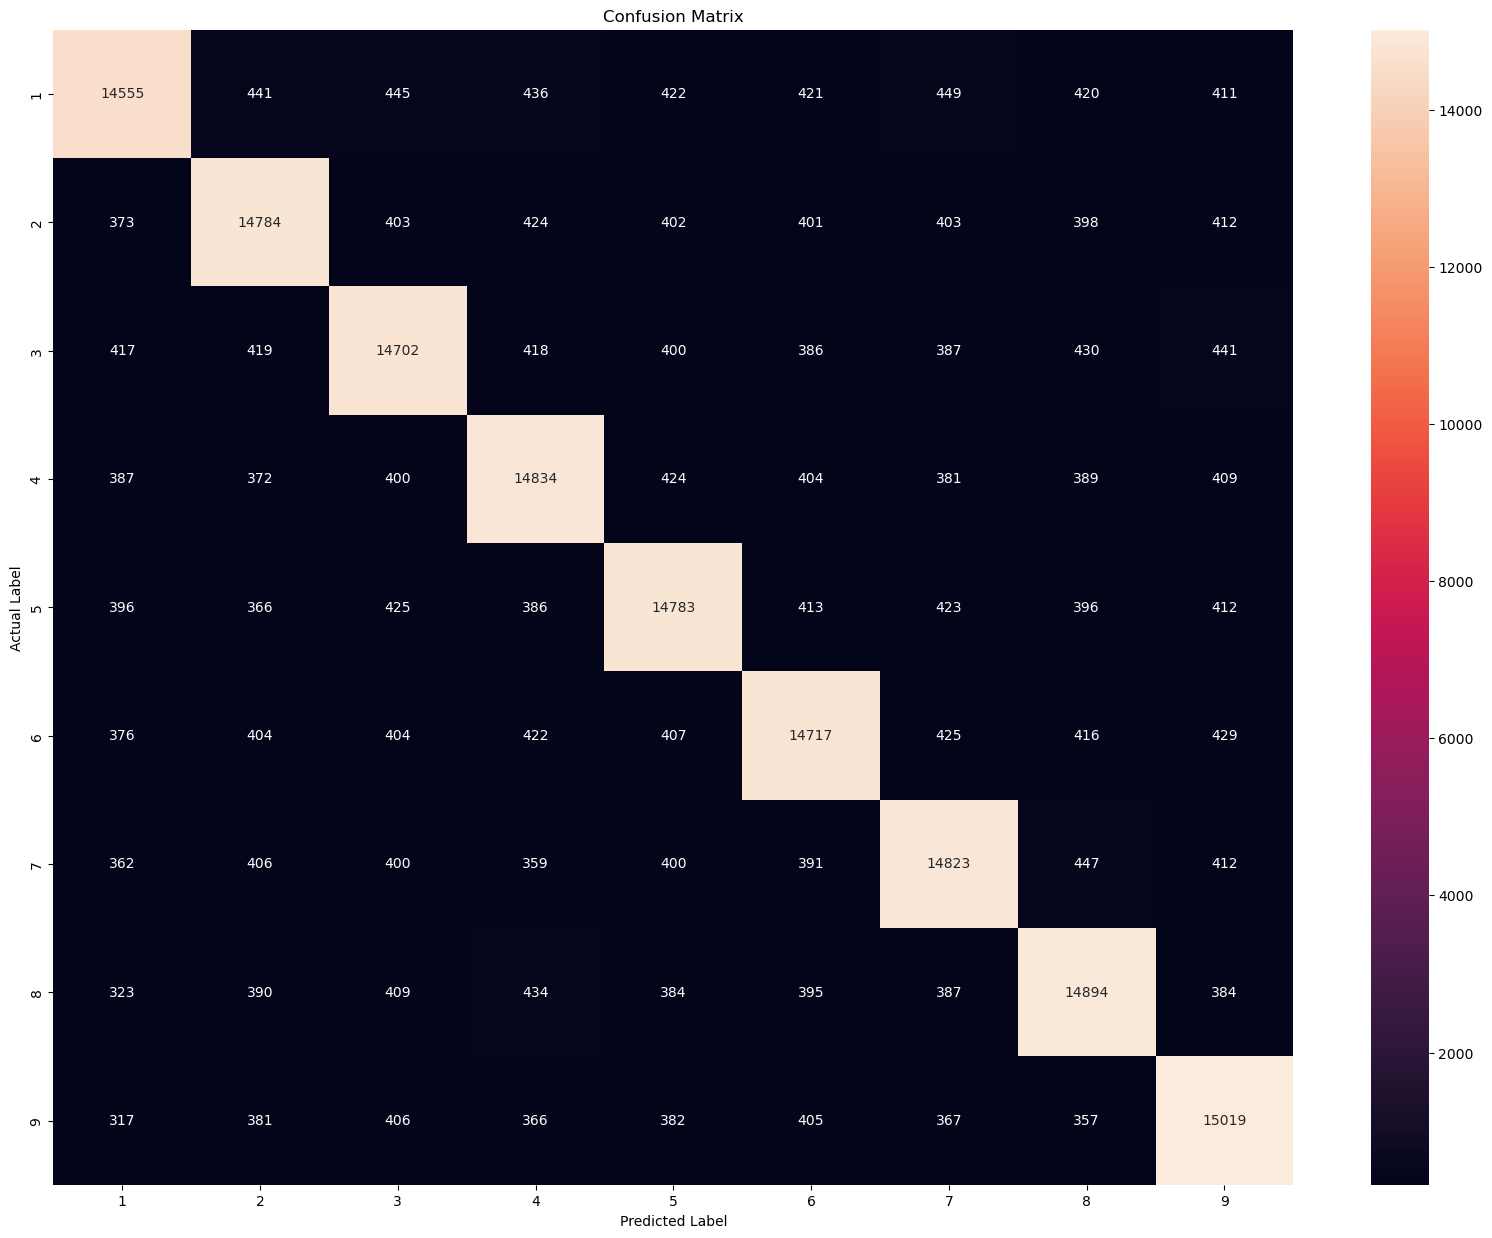

In [220]:
ticks = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(20,15))
sns.heatmap(confusion_matrix, annot=True, fmt='d',xticklabels = ticks, yticklabels = ticks)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [221]:
norm_cm = np.round(confusion_matrix/confusion_matrix.astype(float).sum(axis=1), 4)

Text(220.72222222222223, 0.5, 'Actual Label')

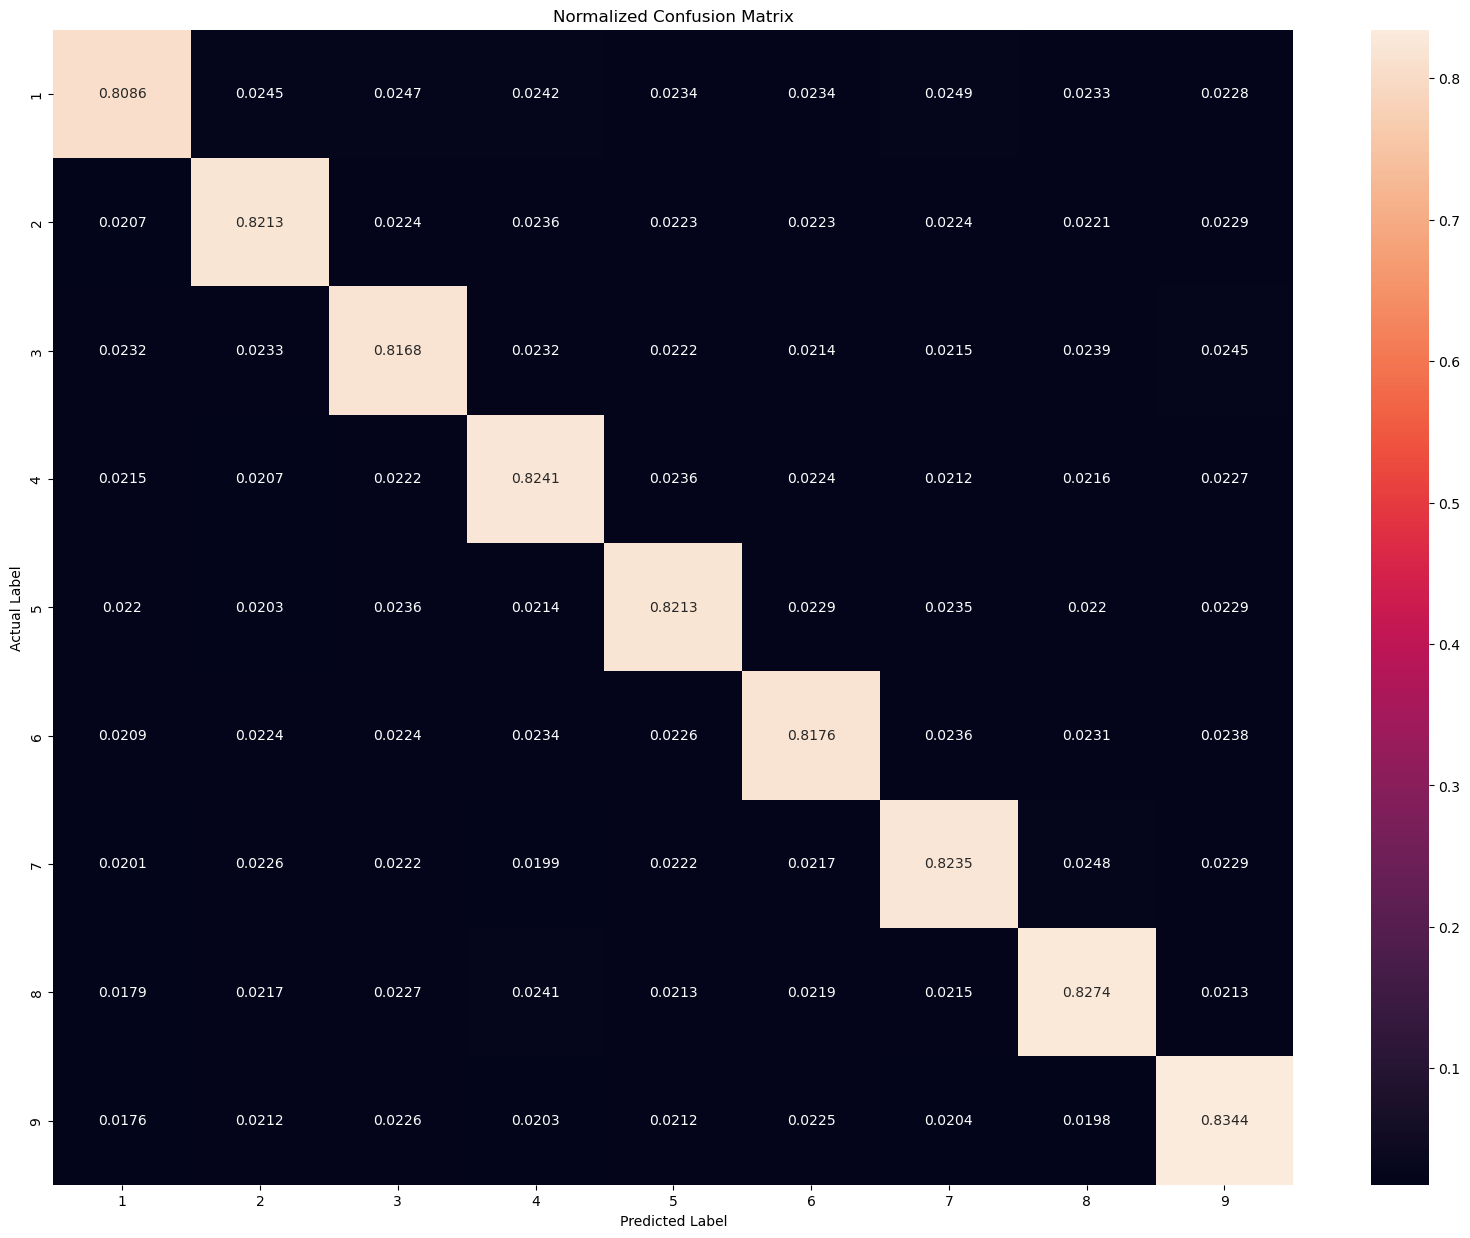

In [222]:
plt.figure(figsize=(20,15))
sns.heatmap(norm_cm, annot=True, fmt='g',xticklabels = ticks, yticklabels = ticks)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [224]:
df = pd.DataFrame(confusion_matrix, index= ['1','2','3','4','5','6','7','8','9'], columns=['1','2','3','4','5','6','7','8','9'], dtype=int)
df.da.export_metrics().iloc[[1]]

,1,2,3,4,5,6,7,8,9,micro-average
f1,0.819861,0.822178,0.816914,0.822307,0.821187,0.819136,0.822472,0.824079,0.826833,0.821673
